***Chargement et affichage de donnée***

Charge le fichier CSV de données météo fusionnées et affiche les premières lignes pour vérifier que les données sont bien lues.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/adriano/data/processed/merged_weather.csv", parse_dates=["date"])
df.head()

,date,city,tavg,tmin,tmax,prcp
0,2020-09-07,Antananarivo,16.0,NaN,24.0,NaN
1,2021-01-02,Antananarivo,20.2,15.2,25.5,0.5
2,2021-01-03,Antananarivo,20.2,16.7,25.1,0.1
3,2021-01-04,Antananarivo,20.0,14.4,26.8,0.0
4,2021-01-05,Antananarivo,21.3,15.9,28.5,0.7


Explorer rapidement le contenu du tableau de données météo pour mieux le comprendre.

In [6]:
df.info()
df.describe()
df['city'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4805 non-null   datetime64[ns]
 1   city    4805 non-null   object        
 2   tavg    4805 non-null   float64       
 3   tmin    4798 non-null   float64       
 4   tmax    4799 non-null   float64       
 5   prcp    3335 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 225.4+ KB


city
Tokyo           1827
Paris           1814
Antananarivo    1164
Name: count, dtype: int64

Vérifie la qualité des données en montrant combien de valeurs sont absentes dans chaque colonne.

In [7]:
df.isna().sum()

date       0
city       0
tavg       0
tmin       7
tmax       6
prcp    1470
dtype: int64

Affiche un graphique de température moyenne dans le temps, avec une ligne pour chaque ville sur 5 ans.

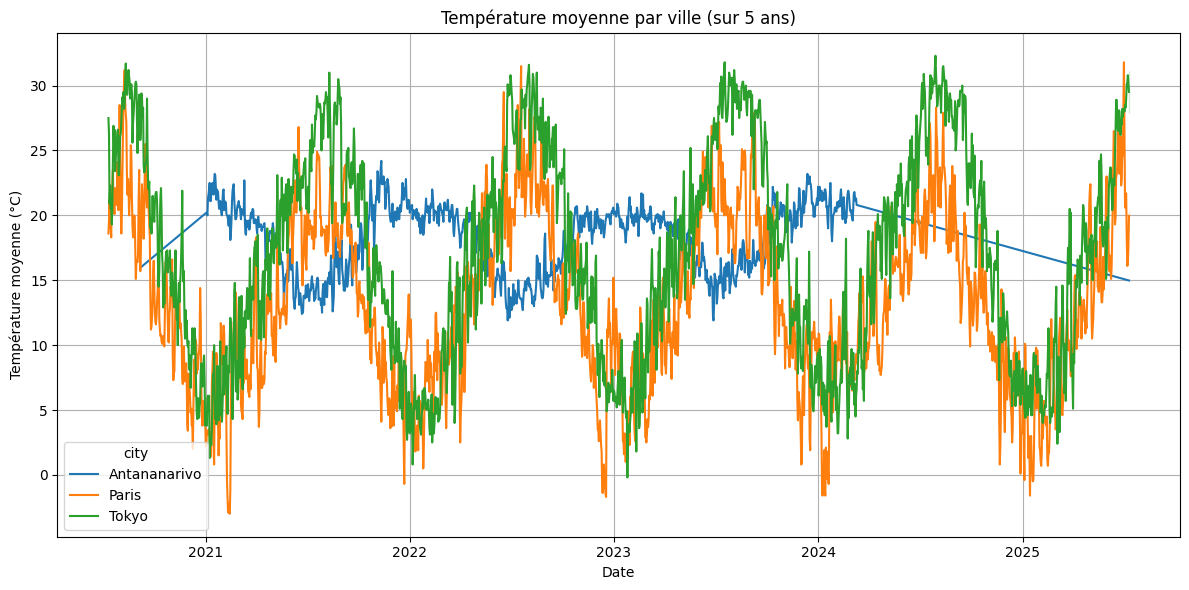

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="tavg", hue="city")
plt.title("Température moyenne par ville (sur 5 ans)")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

Compte le nombre de jours où il a plu dans chaque ville.

In [9]:
df["rainy_day"] = df["prcp"] > 0
rain_stats = df.groupby("city")["rainy_day"].sum().reset_index()
rain_stats.columns = ["Ville", "Nombre de jours pluvieux"]
rain_stats

,Ville,Nombre de jours pluvieux
0,Antananarivo,667
1,Paris,313
2,Tokyo,539


Mesure à quel point les températures varient dans chaque ville (plus le chiffre est grand, plus les températures sont instables ou changent fortement).

In [10]:
df.groupby("city")["tavg"].std().reset_index(name="variabilité_temp_moy")

,city,variabilité_temp_moy
0,Antananarivo,2.591696
1,Paris,6.573172
2,Tokyo,8.081167


Analyse la température moyenne pour chaque ville et comparer les différences de climat entre les villes.

In [11]:
stats = df.groupby("city")["tavg"].agg(["mean", "std", "min", "max"]).reset_index()
stats["amplitude"] = stats["max"] - stats["min"]
stats.sort_values("std", ascending=False)

,city,mean,std,min,max,amplitude
2,Tokyo,17.073032,8.081167,-0.2,32.3,32.5
1,Paris,13.436174,6.573172,-3.0,31.8,34.8
0,Antananarivo,18.249381,2.591696,11.9,24.2,12.3
